<a href="https://colab.research.google.com/github/Lstsk/Machine-Learning-Repo/blob/main/MachineLearningFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

inputs = [
    [1,2,3,2.5],
    [2.0,5.0,-1.0,2.0],
    [-1.5,2.7,3.3,-0.8],
    ]

weights = [[0.2,0.8,-0.5,1.0],[0.5,-0.91,0.26,-0.5],[-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]


weights2 = [[0.1,-0.14,0.5],[-0.5, 0.12,-0.33],[-0.44, 0.73, -0.13]]

biases2 = [-1,2,-0.5]


'''(1*0.2 + 2*0.8 +3 *-0.5+2.5*1.0) + 2
(inputs x weights) + biase
'''
layer1_ouputs = np.dot(inputs, np.array(weights).T) + biases

layer2_ouputs = np.dot(layer1_ouputs, np.array(weights2).T) + biases2

print(layer2_ouputs)




[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [ ]:
import numpy as np

np.random.seed(0)

X = [
    [1,2,3,2.5],
    [2.0,5.0,-1.0,2.0],
    [-1.5,2.7,3.3,-0.8],
    ]

inputs = [0,2,-1,3.3,-2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
  output.append(max(0,i))

print(output)


In [ ]:
import numpy as np

np.random.seed(0)

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


import matplotlib.pyplot as plt

X, y = spiral_data(100,3)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# Exponential Function + Normalization = Softmax

import numpy as np
import nnfs

nnfs.init()

layer_outputs = [[4.8,1.21,2.385],
                 [8.9,-1.81,0.2]
                 ,[1.41,1.051,0.026]]


exp_values = np.exp(layer_outputs)


'''
Normalization 

u/sum of all u


norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
  norm_values.append(value / norm_base)
  '''


norm_values = exp_values / np.sum(exp_values, axis=1,keepdims=True)

print(norm_values)
print(sum(norm_values))



In [ ]:
'''
Loss function with Categorical Cross-Entropy


One-hot encoding

Clasess: 3
Lable: 0
One-hot: [1,0,0]
PredictionL [0.7, 0.1,0.2]
Logarithmn in general is solving for x  in the equtation e^x = b
'''

import numpy as np
import math


softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0]

loss = -(math.log(softmax_output[0])* target_output[0] + 
         math.log(softmax_output[1])* target_output[1]+
         math.log(softmax_output[2])* target_output[2])



print(loss)



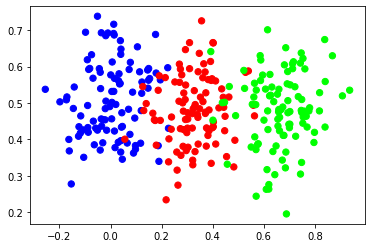

In [ ]:
import matplotlib.pyplot as plt

import nnfs
from nnfs.datasets import vertical_data


nnfs.init()

X,y = vertical_data(samples=100,classes=3)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg')
plt.show()

In [ ]:

import numpy as np
import nnfs
from nnfs.datasets import spiral_data


nnfs.init()

# define two hidden 

'''initializing weights -> random value between 1 and -1
 biases usually initialize as 
'''

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10* np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases


# activation function
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)


class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss
  
class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
    
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()


dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output)

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print(f"Loss: {loss}")




[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]
 [0.33328417 0.33328718 0.33342862]
 [0.33318216 0.33319145 0.33362636]
 [0.33318278 0.33319202 0.33362517]
 [0.33314922 0.33316055 0.3336902 ]
 [0.3331059  0.33311984 0.3337743 ]
 [0.3330813  0.3330968  0.33382186]
 [0.33311027 0.33312503 0.33376473]
 [0.3330537  0.33307084 0.33387548]
 [0.33300948 0.33302936 0.3339612 ]
 [0.33301342 0.33303303 0.33395353]
 [0.33299845 0.333019   0.3339825 ]
 [0.33312678 0.33318865 0.3336846 ]
 [0.3329409  0.33296496 0.33409408]
 [0.33299428 0.33303145 0.33397427]
 [0.3328737  0.33290187 0.33422446]
 [0.3328757  0.33290377 0.33422053]
 [0.33309552 0.33318356 0.33372095]
 [0.33317605 0.33328283 0.3335411 ]
 [0.332894   0.33293876 0.33416727]
 [0.3325638  0.33270204 0.3347342 ]
 [0.33281362 0.33284548 0.3343409 ]
 [0.33314455 0.33327034 0.33358508]
 [0.3331285  0.333258   0.33

In [ ]:
pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
